In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

PCA:  reduce the dimensionality of a data set consisting of a large number of interrelated variables while retaining as much as possible of the variation present in the data set.

Approach 1: use covariance on data X and then eigen decomposition of the covariance matrix

Approach 2: use SVD on data X



Use Approach 1 here: 

----
The steps:

Take the whole dataset consisting of d+1 dimensions and ignore the labels such that our new dataset becomes d dimensional.

Compute the mean for every dimension of the whole dataset.

Compute the covariance matrix of the whole dataset.

Compute eigenvectors and the corresponding eigenvalues.

Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d × k dimensional matrix W.

Use this d × k eigenvector matrix to transform the samples onto the new subspace.

-----


Also reference https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51

In [56]:
# library
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

import seaborn as sb
import matplotlib.pyplot as plt


In [57]:

class PCA_Scratch(object):
    def __init__(self):
        pass
    
    
    def get_PCA(self, X, K):
        
        
        # scaler 
        #scaler = StandardScaler()
        #X_scaled = scaler.fit_transform(X)
            
        X_scaled = X - np.mean(X , axis = 0)

        # covaraiance
        covar_X = np.cov(X_scaled)
            
        # eigen decomposition
        eigen_values, eigen_vectors = np.linalg.eig(covar_X)
        
        #sort the eigenvalues in descending order
        sorted_index = np.argsort(eigen_values)[::-1]

        sorted_eigenvalue = eigen_values[sorted_index]
        #similarly sort the eigenvectors 
        sorted_eigenvectors = eigen_vectors[:,sorted_index]

        eigenvector_subset = sorted_eigenvectors[:,0:K]

        X_reduced = covar_X.dot(eigenvector_subset)    # np.dot(eigenvector_subset.transpose(),covar_X.transpose()).transpose()
        
        return X_reduced

In [58]:
# load dataset
iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df.head())
X = df.drop('target', axis=1)
X

target = df['target'] 

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [59]:
PCA_Scratch_object = PCA_Scratch()

K = 2    # 3
X_reduced = PCA_Scratch_object.get_PCA(X, K)

X_reduced.shape


(150, 2)

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

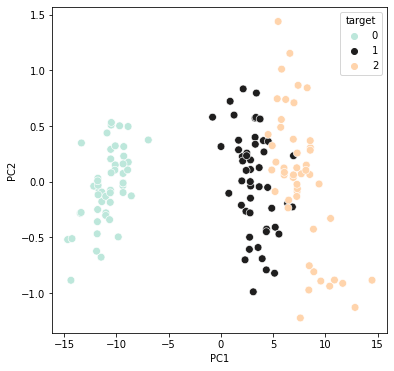

In [60]:
# matplot
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(X_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)


plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')

